In [67]:
pip install unidecode

In [68]:
import re
from unidecode import unidecode
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set()

In [69]:
uri = "/content/teste-glosa.csv"
df = pd.read_csv(uri)
df.head()

,idAluno,IES,PRIMEIRA_PARCELA,NUM_DIAS_EM_ABERTO,NUM_PARCELAS_EM_ABERTO,VALOR_TOTAL_ABERTO,OBSERVACAO
0,39246.00,UniABCD,05/05/2023,18,,"R$ 294,83",16/05/2023 - último módulo cursado
1,36649.00,UniABCD,01/04/2023,52,,"R$ 583,00",24/06/2019 - último módulo cursado
2,11297.00,UniABCD,01/11/2022,203,11,"R$ 3.210,92",26/08/2022 - último módulo cursado
3,12206.00,UniABCD,01/12/2022,173,9,"R$ 2.669,16",01/11/2022 - ultimo módulo cursado
4,9791.00,UniABCD,01/11/2022,203,9,"R$ 2.641,72",nunca frequentou


In [70]:
df.describe()

,idAluno
count,957.00
mean,17773.12
std,12168.41
min,7382.00
25%,8640.00
50%,10060.00
75%,31135.00
max,39672.00


In [71]:
df.isnull().sum()

idAluno                   23
IES                       23
PRIMEIRA_PARCELA          23
NUM_DIAS_EM_ABERTO        23
NUM_PARCELAS_EM_ABERTO    23
VALOR_TOTAL_ABERTO        23
OBSERVACAO                23
dtype: int64

# Analise Valores Nulos

In [72]:
for col in df.columns:
    print(f"Coluna: {col}")
    print(df[col].unique())
    print("-" * 30)

Coluna: idAluno
[39246. 36649. 11297. 12206.  9791.  7442. 11971.  7705.  8471. 10242.
  8510.  7796.  9004. 10587.  9534.  8077.  8483.  9724.  9288.  8369.
  8096. 10227.  7671.  7764.  9734.  9001.  8344.  8123. 10481.  7854.
  7994.  7850.  9119.  8217.  9861.  9670.  8309.  8430.  8846.  9890.
  8304.  8609.  9714. 10303.  8816.  7436. 10983.  9129.  7627. 10289.
  9341.  7667. 10070. 16906.  8654.  9617.  7742.  9072. 10543.  8681.
 10208. 10199. 10232.  8894.  7417.  9490.  8085.  8114. 10186. 10573.
  9882. 10559.  9052.  9394.  8671.  9510. 10287.  8717. 10385.  8140.
  9082.  9153.  7936.  8154.  7565.  9445.  8086.  7889.  9787. 10556.
  9807.  9932.  8979. 10246.  8163.  8292.  9363. 10310.  9258.  7948.
  8412.  9573.  9504.  8899.  8733.  9804.  7647.  9631.  8977.  9924.
 10259.  9506.  8132.  8953.  9440.  9166.  9965. 10581.  8770.  7668.
 10549.  9899.  9008.  8234. 10985.  8880. 10040.  9020. 10372.  8458.
  8995.  7972.  9755.  7415.  8503.  7794.  7413.  9295.  856

In [73]:
df_filtrados = df[df['idAluno'].isna()]
print(df_filtrados)

     idAluno  IES PRIMEIRA_PARCELA NUM_DIAS_EM_ABERTO NUM_PARCELAS_EM_ABERTO  \
794      NaN  NaN              NaN                NaN                    NaN   
813      NaN  NaN              NaN                NaN                    NaN   
815      NaN  NaN              NaN                NaN                    NaN   
817      NaN  NaN              NaN                NaN                    NaN   
824      NaN  NaN              NaN                NaN                    NaN   
828      NaN  NaN              NaN                NaN                    NaN   
845      NaN  NaN              NaN                NaN                    NaN   
851      NaN  NaN              NaN                NaN                    NaN   
864      NaN  NaN              NaN                NaN                    NaN   
866      NaN  NaN              NaN                NaN                    NaN   
873      NaN  NaN              NaN                NaN                    NaN   
876      NaN  NaN              NaN      

In [74]:
df_filtrado = df.dropna(subset=['idAluno'])
df_filtrado['OBSERVACAO'] = df_filtrado['OBSERVACAO'].str.lower()

<ipython-input-74-e5aa19aa3998>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['OBSERVACAO'] = df_filtrado['OBSERVACAO'].str.lower()


In [75]:
df_filtrado

,idAluno,IES,PRIMEIRA_PARCELA,NUM_DIAS_EM_ABERTO,NUM_PARCELAS_EM_ABERTO,VALOR_TOTAL_ABERTO,OBSERVACAO
0,39246.00,UniABCD,05/05/2023,18,,"R$ 294,83",16/05/2023 - último módulo cursado
1,36649.00,UniABCD,01/04/2023,52,,"R$ 583,00",24/06/2019 - último módulo cursado
2,11297.00,UniABCD,01/11/2022,203,11,"R$ 3.210,92",26/08/2022 - último módulo cursado
3,12206.00,UniABCD,01/12/2022,173,9,"R$ 2.669,16",01/11/2022 - ultimo módulo cursado
4,9791.00,UniABCD,01/11/2022,203,9,"R$ 2.641,72",nunca frequentou
...,...,...,...,...,...,...,...
975,39199.00,UniABCD,05/05/2023,18,1,"R$ 294,83",nunca frequentou
976,39242.00,UniABCD,05/05/2023,18,1,"R$ 294,83",nunca frequentou
977,39479.00,UniABCD,05/05/2023,18,1,"R$ 298,00",nunca frequentou
978,39235.00,UniABCD,05/05/2023,18,1,"R$ 294,83",nunca frequentou


# Tratamento Data


In [76]:
def filter_dates(value):
    date_pattern = r'\d{2}/\d{2}/\d{4}'
    if re.match(date_pattern, str(value)):
        return value
    return None

In [77]:
def remove_data_status(row):
    if row['DATA'] is not None:
        return row['OBSERVACAO'].replace(row['DATA'], '')
    return row['OBSERVACAO']

In [78]:
df_filtrado["DATA"] = df_filtrado["OBSERVACAO"].str.split(expand = True)[0]

<ipython-input-78-20244530975a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["DATA"] = df_filtrado["OBSERVACAO"].str.split(expand = True)[0]


In [79]:
df_filtrado['DATA'] = df_filtrado['DATA'].apply(filter_dates)

<ipython-input-79-53b151d92a8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['DATA'] = df_filtrado['DATA'].apply(filter_dates)


In [80]:
df_filtrado['OBSERVACAO'] = df_filtrado.apply(remove_data_status, axis=1)

<ipython-input-80-7a41d77ac44d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['OBSERVACAO'] = df_filtrado.apply(remove_data_status, axis=1)


In [81]:
dfStatus = df_filtrado["DATA"].isnull()
dfComStatus = df_filtrado["DATA"].notnull()
df_semData = df_filtrado[dfStatus]
df_comData = df_filtrado[dfComStatus]

## Tratamento Com Data

In [82]:
df_comData['OBSERVACAO'] = df_comData['OBSERVACAO'].str.replace('-', '')
df_comData['OBSERVACAO'] = df_comData['OBSERVACAO'].str.strip()
df_comData['OBSERVACAO'] = df_comData['OBSERVACAO'].apply(unidecode)

<ipython-input-82-ebd66f0bb10f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comData['OBSERVACAO'] = df_comData['OBSERVACAO'].str.replace('-', '')
<ipython-input-82-ebd66f0bb10f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comData['OBSERVACAO'] = df_comData['OBSERVACAO'].str.strip()
<ipython-input-82-ebd66f0bb10f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [83]:
df_comData.loc[df_comData['OBSERVACAO'].str.contains('falta so', case=False), 'OBSERVACAO'] = 'ultimo modulo cursado falta estagio'
df_comData.loc[df_comData['OBSERVACAO'].str.contains('expulso', case=False), 'OBSERVACAO'] = 'expulso'
df_comData.loc[df_comData['OBSERVACAO'].str.contains('escolar', case=False), 'OBSERVACAO'] = 'transferencia escolar'
df_comData['OBSERVACAO'] = df_comData['OBSERVACAO'].str.replace('ultomo', 'ultimo', case=False)
df_comData['OBSERVACAO'] = df_comData['OBSERVACAO'].str.replace('ultimlo', 'ultimo', case=False)
df_comData['OBSERVACAO'] = df_comData['OBSERVACAO'].str.replace('ultimi', 'ultimo', case=False)
df_comData['OBSERVACAO'] = df_comData['OBSERVACAO'].str.replace('curso', 'cursado', case=False)
df_comData['OBSERVACAO'] = df_comData['OBSERVACAO'].str.replace('ultimo modulo frequentado', 'ultimo modulo cursado', case=False)

<ipython-input-83-2a2e51dfd366>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comData['OBSERVACAO'] = df_comData['OBSERVACAO'].str.replace('ultomo', 'ultimo', case=False)
<ipython-input-83-2a2e51dfd366>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comData['OBSERVACAO'] = df_comData['OBSERVACAO'].str.replace('ultimlo', 'ultimo', case=False)
<ipython-input-83-2a2e51dfd366>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [84]:
df_comData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 979
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idAluno                 551 non-null    float64
 1   IES                     551 non-null    object 
 2   PRIMEIRA_PARCELA        551 non-null    object 
 3   NUM_DIAS_EM_ABERTO      551 non-null    object 
 4   NUM_PARCELAS_EM_ABERTO  551 non-null    object 
 5   VALOR_TOTAL_ABERTO      551 non-null    object 
 6   OBSERVACAO              551 non-null    object 
 7   DATA                    551 non-null    object 
dtypes: float64(1), object(7)
memory usage: 38.7+ KB


In [85]:
df_comData.head()

,idAluno,IES,PRIMEIRA_PARCELA,NUM_DIAS_EM_ABERTO,NUM_PARCELAS_EM_ABERTO,VALOR_TOTAL_ABERTO,OBSERVACAO,DATA
0,39246.00,UniABCD,05/05/2023,18,,"R$ 294,83",ultimo modulo cursado,16/05/2023
1,36649.00,UniABCD,01/04/2023,52,,"R$ 583,00",ultimo modulo cursado,24/06/2019
2,11297.00,UniABCD,01/11/2022,203,11,"R$ 3.210,92",ultimo modulo cursado,26/08/2022
3,12206.00,UniABCD,01/12/2022,173,9,"R$ 2.669,16",ultimo modulo cursado,01/11/2022
5,7442.00,UniABCD,01/11/2022,203,9,"R$ 2.714,40",ultimo modulo cursado,01/11/2022


In [86]:
df_comData["OBSERVACAO"].value_counts()

ultimo modulo cursado                         413
ultimo modulo cursado falta estagio            99
entrou em rescisao                             15
solicitou retorno e nao frequentou              7
ultimo estagio cursado                          7
transferencia escolar                           4
trancou                                         3
expulso                                         2
ultimo modulo cursado/rescisao de contrato      1
Name: OBSERVACAO, dtype: int64

## Tratamento Sem Data

In [87]:
df_semData['OBSERVACAO'] = df_semData['OBSERVACAO'].str.strip()

<ipython-input-87-dead0d74a23a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_semData['OBSERVACAO'] = df_semData['OBSERVACAO'].str.strip()


In [88]:
df_semData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 4 to 978
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idAluno                 406 non-null    float64
 1   IES                     406 non-null    object 
 2   PRIMEIRA_PARCELA        406 non-null    object 
 3   NUM_DIAS_EM_ABERTO      406 non-null    object 
 4   NUM_PARCELAS_EM_ABERTO  406 non-null    object 
 5   VALOR_TOTAL_ABERTO      406 non-null    object 
 6   OBSERVACAO              406 non-null    object 
 7   DATA                    0 non-null      object 
dtypes: float64(1), object(7)
memory usage: 28.5+ KB


In [89]:
df_semData.head()

,idAluno,IES,PRIMEIRA_PARCELA,NUM_DIAS_EM_ABERTO,NUM_PARCELAS_EM_ABERTO,VALOR_TOTAL_ABERTO,OBSERVACAO,DATA
4,9791.00,UniABCD,01/11/2022,203,9,"R$ 2.641,72",nunca frequentou,None
7,7705.00,UniABCD,01/11/2022,203,7,"R$ 2.117,36",formado,None
23,7764.00,UniABCD,01/11/2022,203,7,"R$ 2.111,20",frequenta,None
24,9734.00,UniABCD,01/11/2022,203,7,"R$ 2.004,52",frequenta,None
32,9119.00,UniABCD,01/11/2022,203,7,"R$ 1.911,91",nunca frequentou,None


In [90]:
df_semData["OBSERVACAO"].value_counts()

nunca frequentou                 235
frequenta                         86
formado                           56
em conclusão                      15
concluiu todas disciplinas        11
fazendo disciplinas pendentes      2
não encontrado                     1
Name: OBSERVACAO, dtype: int64

In [91]:
for col in df_semData.columns:
    print(f"Coluna: {col}")
    print(df_semData[col].unique())
    print("-" * 30)

Coluna: idAluno
[ 9791.  7705.  7764.  9734.  9119.  8309.  8430.  8609.  9714.  7436.
 10983. 10289.  9617.  7742. 10543. 10199.  8894.  7417.  8085.  9882.
  9510.  9153. 10556.  9932. 10246.  8292.  9258.  8412.  8977.  9440.
  9008.  9020.  8458.  9295.  8748.  9902.  8932. 10990.  8337.  8621.
  8918.  7618.  9142.  8272.  8406.  7551.  8253.  7868.  9905. 10178.
  9522.  8035. 10146.  9474.  9602.  8602. 10563.  9815.  8029.  8387.
 10210.  8069. 10212. 10104.  9722.  9172.  8377. 13369.  8067.  8281.
 13381. 13384.  7812. 13420. 13428. 13434. 11221. 11859.  7740. 13454.
  9409. 13460.  9827.  9759.  9226. 13481.  7727. 18007. 18012. 10356.
 18014. 18021. 18028. 18026.  9481.  8865. 18029. 18031. 10323.  7811.
 12117. 10011.  8322. 10489. 16917. 18069.  8287. 18081. 18093. 18092.
 21266. 21194. 10231.  8034. 21233. 21251.  7977. 21118. 11504.  7549.
 21089. 10353.  7701.  7515.  8466. 10986. 21271.  9187. 21190.  9860.
  7686. 21127.  9745.  9103.  9915.  7694.  9167. 21216. 1138

# Gerar Variavel Categorica

In [92]:
df_geral = pd.concat([df_semData, df_comData], ignore_index=True)

In [93]:
mapeamento = {
    'nunca frequentou': 0,
    'formado': 1,
    'frequenta': 2,
    'em conclusão': 3,
    'concluiu todas disciplinas': 4,
    'fazendo disciplinas pendentes': 5,
    'não encontrado': 6,
    'ultimo modulo cursado': 7,
    'ultimo modulo cursado falta estagio': 8,
    'entrou em rescisao': 9,
    'solicitou retorno e nao frequentou': 10,
    'ultimo estagio cursado': 11,
    'transferencia escolar': 12,
    'trancou': 13,
    'expulso': 14,
    'ultimo modulo cursado/rescisao de contrato': 15,
}

df_geral["idStatus"] = df_geral["OBSERVACAO"].replace(mapeamento)
df_geral

,idAluno,IES,PRIMEIRA_PARCELA,NUM_DIAS_EM_ABERTO,NUM_PARCELAS_EM_ABERTO,VALOR_TOTAL_ABERTO,OBSERVACAO,DATA,idStatus
0,9791.00,UniABCD,01/11/2022,203,9,"R$ 2.641,72",nunca frequentou,None,0
1,7705.00,UniABCD,01/11/2022,203,7,"R$ 2.117,36",formado,None,1
2,7764.00,UniABCD,01/11/2022,203,7,"R$ 2.111,20",frequenta,None,2
3,9734.00,UniABCD,01/11/2022,203,7,"R$ 2.004,52",frequenta,None,2
4,9119.00,UniABCD,01/11/2022,203,7,"R$ 1.911,91",nunca frequentou,None,0
...,...,...,...,...,...,...,...,...,...
952,7781.00,UniABCD,01/11/2022,203,1,"R$ 267,28",ultimo modulo cursado,30/06/2022,7
953,8492.00,UniABCD,01/11/2022,203,1,"R$ 420,13",ultimo estagio cursado,20/09/2022,11
954,39254.00,UniABCD,05/05/2023,18,1,"R$ 250,00",ultimo modulo cursado,08/05/2023,7
955,39252.00,UniABCD,11/05/2023,12,1,"R$ 292,93",ultimo estagio cursado,23/11/2020,11


In [94]:
df_geral["idStatus"].value_counts()

7     413
0     235
8      99
2      86
1      56
3      15
9      15
4      11
10      7
11      7
12      4
13      3
5       2
14      2
6       1
15      1
Name: idStatus, dtype: int64

In [95]:
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idAluno                 957 non-null    float64
 1   IES                     957 non-null    object 
 2   PRIMEIRA_PARCELA        957 non-null    object 
 3   NUM_DIAS_EM_ABERTO      957 non-null    object 
 4   NUM_PARCELAS_EM_ABERTO  957 non-null    object 
 5   VALOR_TOTAL_ABERTO      957 non-null    object 
 6   OBSERVACAO              957 non-null    object 
 7   DATA                    551 non-null    object 
 8   idStatus                957 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 67.4+ KB


In [96]:
df_geral = df_geral.drop(664)
df_geral = df_geral.drop(950)

In [97]:
df_geral['PRIMEIRA_PARCELA'] = pd.to_datetime(df_geral['PRIMEIRA_PARCELA'])
df_geral['DATA'] = pd.to_datetime(df_geral['DATA'])

<ipython-input-97-45a6e2dff0fc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_geral['PRIMEIRA_PARCELA'] = pd.to_datetime(df_geral['PRIMEIRA_PARCELA'])
<ipython-input-97-45a6e2dff0fc>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_geral['DATA'] = pd.to_datetime(df_geral['DATA'])


In [98]:
mapeamento = {
    ' ': 0,
}
col_numericas = ['NUM_PARCELAS_EM_ABERTO','NUM_DIAS_EM_ABERTO']

df_geral[col_numericas] = df_geral[col_numericas].replace(mapeamento)
df_geral[col_numericas] = df_geral[col_numericas].astype(np.int64)

In [99]:
df_geral['VALOR_TOTAL_ABERTO'] = df_geral['VALOR_TOTAL_ABERTO'].apply(lambda x: x.replace('R$', '').replace('.','').replace(',','.').strip())
df_geral['VALOR_TOTAL_ABERTO'] = df_geral['VALOR_TOTAL_ABERTO'].astype(np.float64)

# Analise Geral


In [100]:
df_geral

,idAluno,IES,PRIMEIRA_PARCELA,NUM_DIAS_EM_ABERTO,NUM_PARCELAS_EM_ABERTO,VALOR_TOTAL_ABERTO,OBSERVACAO,DATA,idStatus
0,9791.00,UniABCD,2022-01-11,203,9,2641.72,nunca frequentou,NaT,0
1,7705.00,UniABCD,2022-01-11,203,7,2117.36,formado,NaT,1
2,7764.00,UniABCD,2022-01-11,203,7,2111.20,frequenta,NaT,2
3,9734.00,UniABCD,2022-01-11,203,7,2004.52,frequenta,NaT,2
4,9119.00,UniABCD,2022-01-11,203,7,1911.91,nunca frequentou,NaT,0
...,...,...,...,...,...,...,...,...,...
952,7781.00,UniABCD,2022-01-11,203,1,267.28,ultimo modulo cursado,2022-06-30,7
953,8492.00,UniABCD,2022-01-11,203,1,420.13,ultimo estagio cursado,2022-09-20,11
954,39254.00,UniABCD,2023-05-05,18,1,250.00,ultimo modulo cursado,2023-08-05,7
955,39252.00,UniABCD,2023-11-05,12,1,292.93,ultimo estagio cursado,2020-11-23,11


<ipython-input-101-4dc59271da3b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_geral.corr(), dtype=bool))
<ipython-input-101-4dc59271da3b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_geral.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')


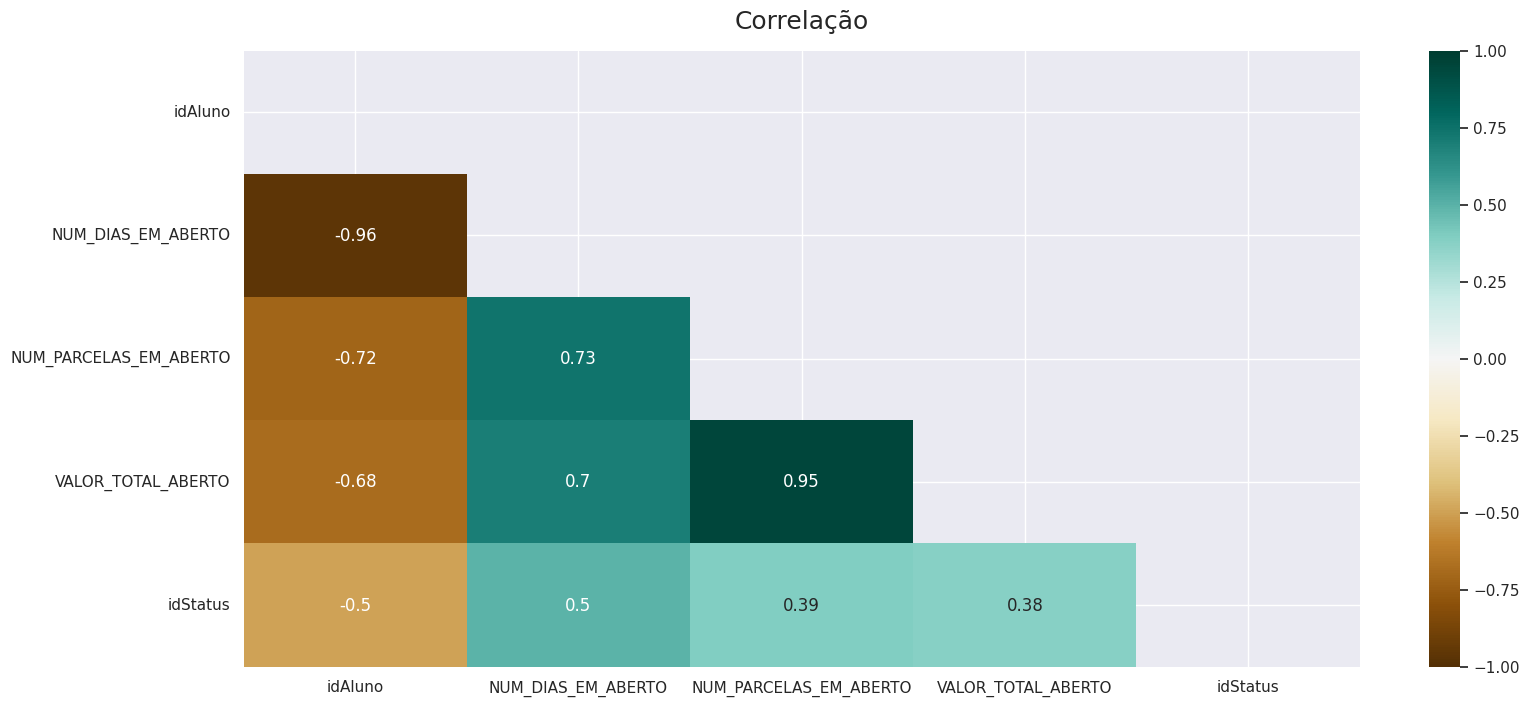

In [101]:
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(df_geral.corr(), dtype=bool))
heatmap = sns.heatmap(df_geral.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

# Topico 1 - Situação dos Alunos

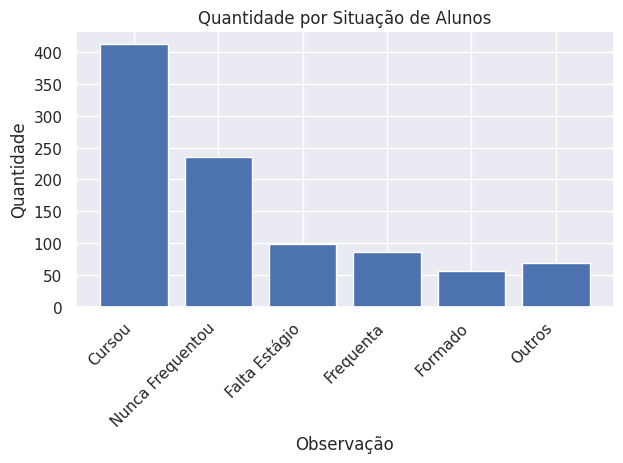

In [102]:
# Outros - Rescisao, Concluiu Disciplinas, Solicitou Retorno nao frequentou, Cursou Estagio, Transferencia, Trancou, Fazendo Disciplinas Pendentes, Expulso, Nao Encontrado, Cursado/Rescisao
df_obsFiltred = df_geral['OBSERVACAO'].value_counts()
df_obsFiltred['Outros'] = df_obsFiltred[df_obsFiltred < 56].sum()
df_obsFiltred2 = df_obsFiltred[df_obsFiltred >= 56]
labels = ["Cursou","Nunca Frequentou","Falta Estágio","Frequenta","Formado","Outros"]

plt.bar(labels, df_obsFiltred2.values)
plt.xlabel('Observação')
plt.ylabel('Quantidade')
plt.title('Quantidade por Situação de Alunos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

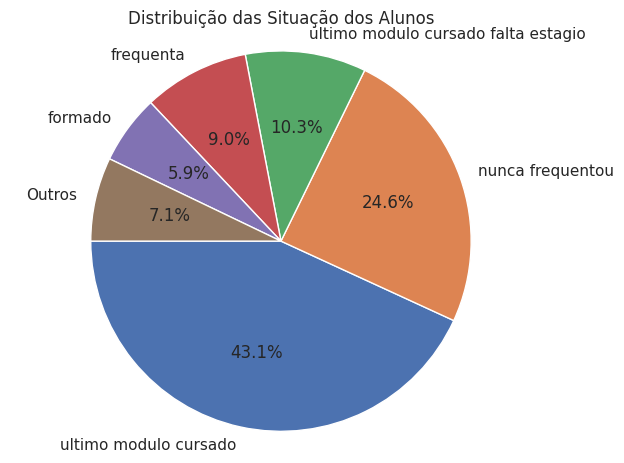

In [106]:
# Criar o gráfico de pizza
plt.pie(df_obsFiltred2, labels=df_obsFiltred2.index, autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title('Distribuição das Situação dos Alunos')
plt.tight_layout()
plt.show()

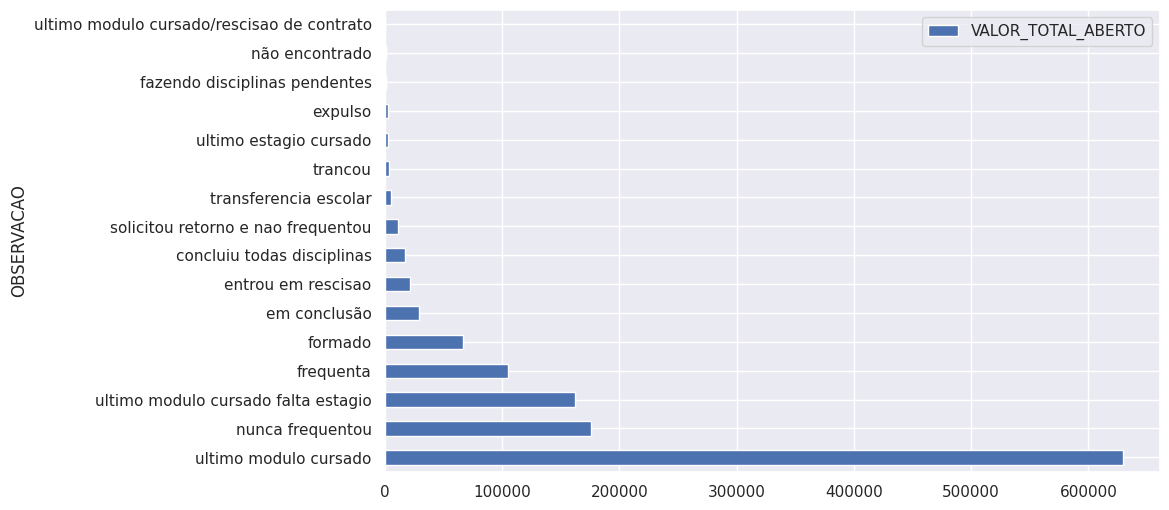

In [107]:
labelsObsNumParc = ["Outros","Frequenta","Nunca Frequentou","Cursou até 2022","Cursou em 2023","Falta Estágio"]
df_contagem = df_geral.groupby('OBSERVACAO')[['VALOR_TOTAL_ABERTO']].sum().sort_values('VALOR_TOTAL_ABERTO', ascending = False)
df_contagem.plot(kind = 'barh', figsize = (10,6));

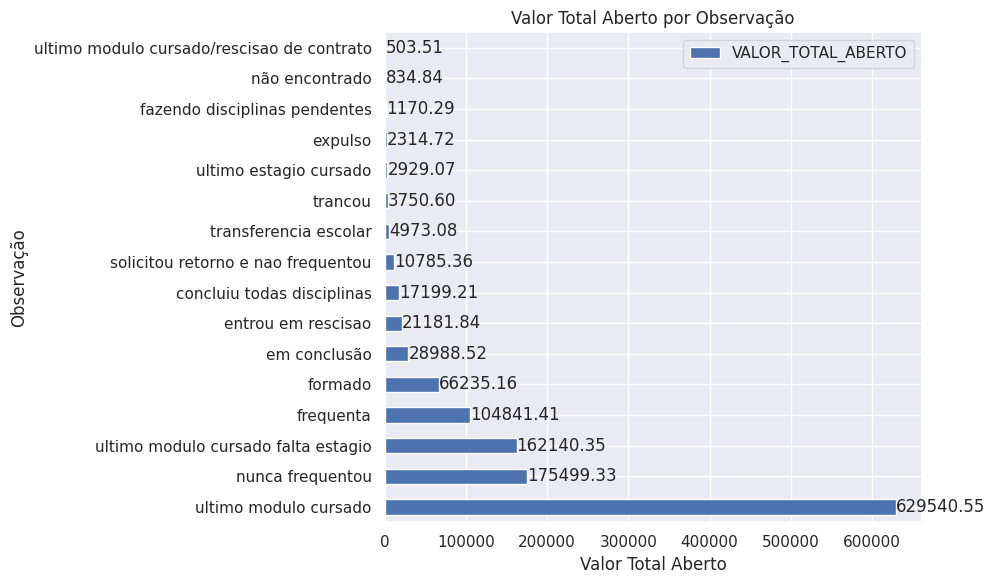

In [108]:
labelsObsNumParc = ["Cursou até 2022","Nunca Frequentou","Falta Estágio" , "Outros", "Cursou em 2023", "Frequenta"]

# Criação do gráfico de barras horizontal
ax = df_contagem.plot(kind='barh', figsize=(10, 6))

# Adicionar etiquetas (labels) aos valores das barras
for index, value in enumerate(df_contagem['VALOR_TOTAL_ABERTO']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center')

# Configurações do gráfico
plt.xlabel('Valor Total Aberto')
plt.ylabel('Observação')
plt.title('Valor Total Aberto por Observação')
plt.yticks(range(len(df_contagem)), df_contagem.index)
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Topico 2 - Situação que tem o maior valor total em aberto

In [110]:
valor_maximo = df_geral['VALOR_TOTAL_ABERTO'].max()
valor_maximo

3500.92

In [111]:
df_geral.query("VALOR_TOTAL_ABERTO == 3500.92")

,idAluno,IES,PRIMEIRA_PARCELA,NUM_DIAS_EM_ABERTO,NUM_PARCELAS_EM_ABERTO,VALOR_TOTAL_ABERTO,OBSERVACAO,DATA,idStatus
414,8510.00,UniABCD,2022-05-11,199,7,3500.92,ultimo modulo cursado,2023-01-30,7


In [112]:
df_geral.query("VALOR_TOTAL_ABERTO > 3000")

,idAluno,IES,PRIMEIRA_PARCELA,NUM_DIAS_EM_ABERTO,NUM_PARCELAS_EM_ABERTO,VALOR_TOTAL_ABERTO,OBSERVACAO,DATA,idStatus
408,11297.00,UniABCD,2022-01-11,203,11,3210.92,ultimo modulo cursado,2022-08-26,7
414,8510.00,UniABCD,2022-05-11,199,7,3500.92,ultimo modulo cursado,2023-01-30,7
650,8046.00,UniABCD,2022-05-11,199,7,3423.70,ultimo modulo cursado,2022-09-20,7


In [113]:
df_geral.query("idAluno == 8510.00")

,idAluno,IES,PRIMEIRA_PARCELA,NUM_DIAS_EM_ABERTO,NUM_PARCELAS_EM_ABERTO,VALOR_TOTAL_ABERTO,OBSERVACAO,DATA,idStatus
414,8510.00,UniABCD,2022-05-11,199,7,3500.92,ultimo modulo cursado,2023-01-30,7


# Topico 3 - Situação apenas NÚMERO PARCELAS ABERTAS

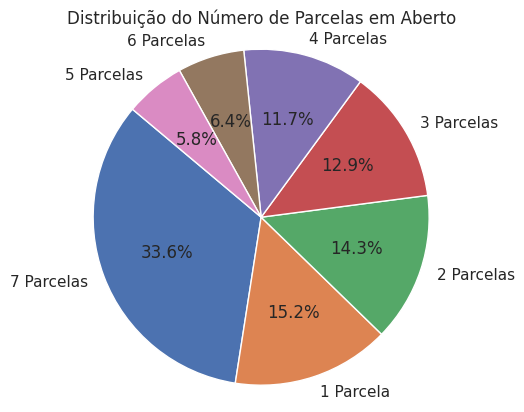

In [115]:

num_parc_counts = df_geral['NUM_PARCELAS_EM_ABERTO'].value_counts()
num_parc_counts['Outros'] = num_parc_counts[num_parc_counts < 55].sum()
num_parc_counts = num_parc_counts[num_parc_counts >= 55]
labelsParcela = ["7 Parcelas","1 Parcela","2 Parcelas","3 Parcelas","4 Parcelas","6 Parcelas","5 Parcelas"]
# Criar o gráfico de pizza com a distribuição dos valores
plt.pie(num_parc_counts, labels=labelsParcela, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Torna o gráfico de pizza circular
plt.title('Distribuição do Número de Parcelas em Aberto')

# Exibir o gráfico
plt.show()

In [116]:
num_parc_counts = df_geral['NUM_PARCELAS_EM_ABERTO'].value_counts()
num_parc_counts

7     319
1     144
2     136
3     122
4     111
6      61
5      55
9       3
0       2
11      1
8       1
Name: NUM_PARCELAS_EM_ABERTO, dtype: int64

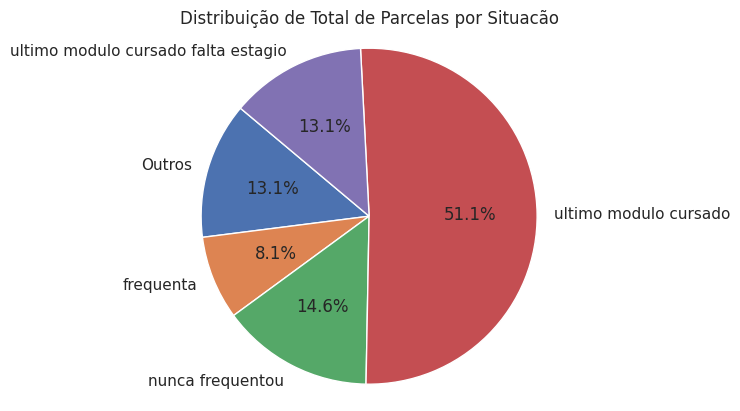

In [117]:
# Contar a frequência de cada valor na coluna 'OBSERVACAO'
obs_counts = df_geral['OBSERVACAO'].value_counts()

# Identificar os valores que ocorrem 56 vezes ou menos
obs_to_combine = obs_counts[obs_counts <= 56].index

# Substituir os valores da coluna 'OBSERVACAO' pelo valor 'Outros' se estiverem na lista a ser combinada
df_geral.loc[df_geral['OBSERVACAO'].isin(obs_to_combine), 'OBSERVACAO'] = 'Outros'

# Agrupar os dados pela coluna 'OBSERVACAO' e calcular a soma dos valores 'NUM_PARCELAS_EM_ABERTO'
df_obsNumParc = df_geral.groupby('OBSERVACAO')['NUM_PARCELAS_EM_ABERTO'].sum()
labelsObsNumParc = ["Outros","Frequenta","Nunca Frequentou","Cursou até 2022","Cursou em 2023","Falta Estágio"]

plt.pie(df_obsNumParc, labels=df_obsNumParc.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Torna o gráfico de pizza circular
plt.title('Distribuição de Total de Parcelas por Situacão')

# Exibir o gráfico
plt.show()

In [118]:
df_obsNumParc

OBSERVACAO
Outros                                  544
frequenta                               334
nunca frequentou                        607
ultimo modulo cursado                  2119
ultimo modulo cursado falta estagio     542
Name: NUM_PARCELAS_EM_ABERTO, dtype: int64

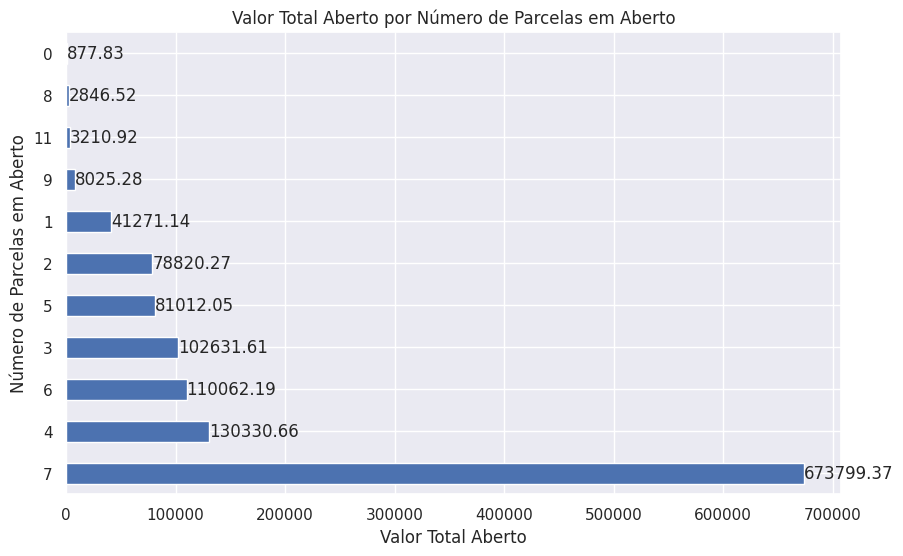

In [119]:
df_valorPorNumParc = df_geral.groupby('NUM_PARCELAS_EM_ABERTO')['VALOR_TOTAL_ABERTO'].sum().sort_values(ascending=False)

# Criar o gráfico de barras horizontais com 'NUM_PARCELAS_EM_ABERTO' no eixo X
ax = df_valorPorNumParc.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Valor Total Aberto')
plt.ylabel('Número de Parcelas em Aberto')
plt.title('Valor Total Aberto por Número de Parcelas em Aberto')

# Adicionar os valores das barras no texto acima de cada barra
for index, value in enumerate(df_valorPorNumParc):
    ax.text(value, index, f'{value:.2f}', va='center')

# Configurar os rótulos do eixo Y
plt.yticks(range(len(df_valorPorNumParc)), df_valorPorNumParc.index)

# Exibir o gráfico
plt.show()

In [120]:
# Agrupar os dados pela coluna 'NUM_PARCELAS_EM_ABERTO' e calcular a soma dos valores 'VALOR_TOTAL_ABERTO'
df_valorPorNumParc =  df_geral.groupby('NUM_PARCELAS_EM_ABERTO')['VALOR_TOTAL_ABERTO'].sum().sort_values(ascending=False)

# Calcular a soma total dos valores
total_sum = df_valorPorNumParc.sum()

# Calcular a porcentagem de cada valor em relação à soma total
df_valorPorNumParc_percent = (df_valorPorNumParc / total_sum) * 100

# Exibir a porcentagem de cada valor
print(df_valorPorNumParc_percent)

NUM_PARCELAS_EM_ABERTO
7    54.65
4    10.57
6     8.93
3     8.32
5     6.57
2     6.39
1     3.35
9     0.65
11    0.26
8     0.23
0     0.07
Name: VALOR_TOTAL_ABERTO, dtype: float64


<Axes: title={'center': 'Distribuicao do Número de Parcelas em Aberto po Valor Total Aberto'}, xlabel='Número de Parcelas em Aberto', ylabel='Valor Total Aberto'>

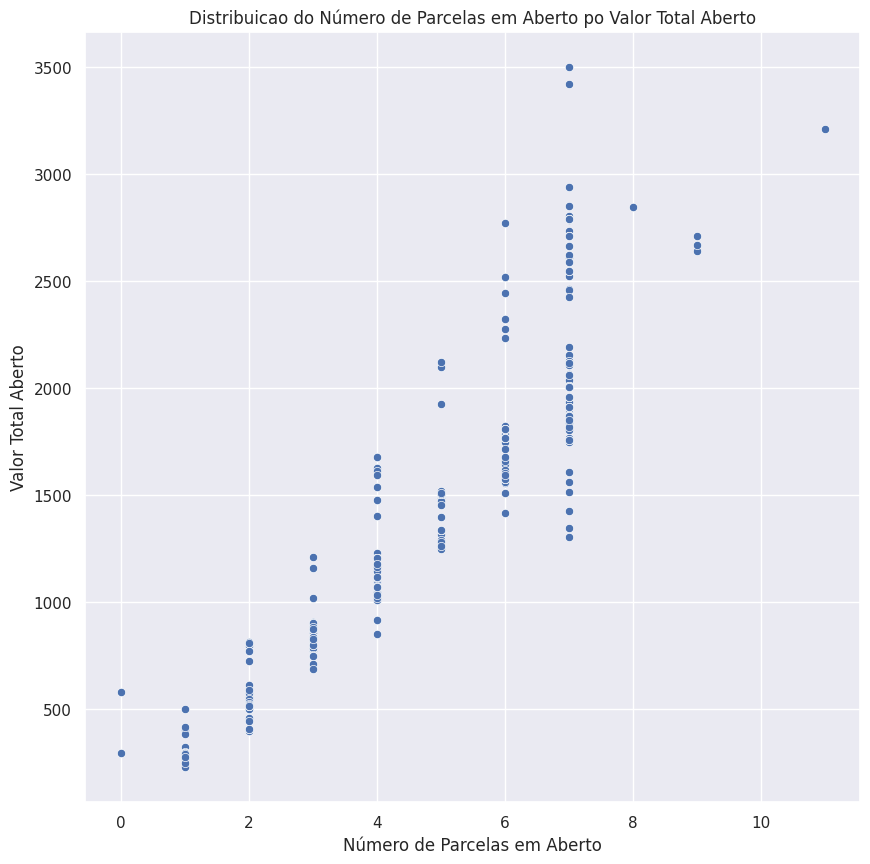

In [121]:
plt.figure(figsize=(10, 10))
plt.xlabel('Número de Parcelas em Aberto')
plt.ylabel('Valor Total Aberto')
plt.title('Distribuicao do Número de Parcelas em Aberto po Valor Total Aberto')
sns.scatterplot(data = df_geral, x="NUM_PARCELAS_EM_ABERTO", y="VALOR_TOTAL_ABERTO")

# Topico 4 - Situação apenas a data da PRIMEIRA PARCELA

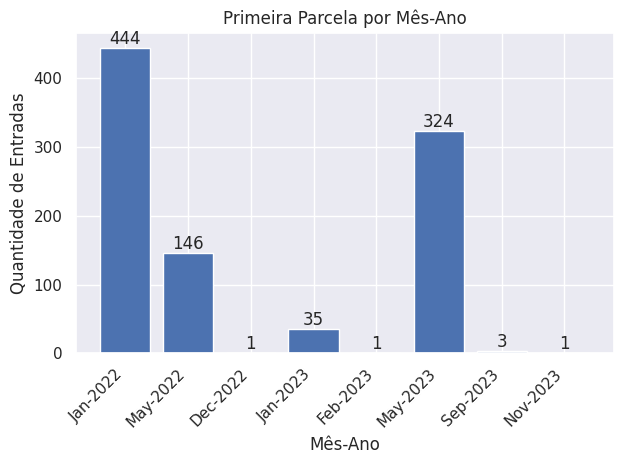

In [122]:
import calendar
df_grouped = df_geral.groupby([df_geral['PRIMEIRA_PARCELA'].dt.year, df_geral['PRIMEIRA_PARCELA'].dt.month])['idAluno'].count()

# Criar o gráfico de barras com meses e anos no eixo x e quantidades no eixo y
x_labels = [f'{calendar.month_abbr[month]}-{year}' for year, month in df_grouped.index]
plt.bar(range(len(df_grouped)), df_grouped.values)
plt.xlabel('Mês-Ano')
plt.ylabel('Quantidade de Entradas')
plt.title('Primeira Parcela por Mês-Ano')
plt.xticks(range(len(df_grouped)), x_labels, rotation=45, ha='right')

# Adicionar os valores das porcentagens ao lado de cada barra
for i, value in enumerate(df_grouped.values):
    plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.tight_layout()

# Exibir o gráfico
plt.show()

In [123]:
df_grouped

PRIMEIRA_PARCELA  PRIMEIRA_PARCELA
2022              1                   444
                  5                   146
                  12                    1
2023              1                    35
                  2                     1
                  5                   324
                  9                     3
                  11                    1
Name: idAluno, dtype: int64

In [124]:
# Calcular o total de entradas
total_entradas = df_grouped.sum()

# Calcular a porcentagem de distribuição
porcentagem_distribuicao = (df_grouped / total_entradas) * 100
porcentagem_distribuicao

PRIMEIRA_PARCELA  PRIMEIRA_PARCELA
2022              1                  46.49
                  5                  15.29
                  12                  0.10
2023              1                   3.66
                  2                   0.10
                  5                  33.93
                  9                   0.31
                  11                  0.10
Name: idAluno, dtype: float64

# Conclusao


In [125]:
def update_observacao(row):
    if row['idStatus'] == 7:
      if row['DATA'].year <= 2022:
        return 'ultimo modulo cursado ate 2022'
      else:
        return 'ultimo modulo cursado em 2023'
    else:
        return row['OBSERVACAO']

In [126]:
df_geral['OBSERVACAO'] = df_geral.apply(update_observacao, axis=1)

In [127]:
df_geral["OBSERVACAO"].value_counts()

ultimo modulo cursado ate 2022         287
nunca frequentou                       235
ultimo modulo cursado em 2023          125
Outros                                 124
ultimo modulo cursado falta estagio     98
frequenta                               86
Name: OBSERVACAO, dtype: int64

In [128]:
# Filtrando e agrupando os dados
criteria = (df_geral['NUM_DIAS_EM_ABERTO'] > 100) & (df_geral['NUM_PARCELAS_EM_ABERTO'] > 4)& (df_geral['NUM_PARCELAS_EM_ABERTO'] > 4)
df_glosa = df_geral[criteria]

In [129]:
df_glosa.describe()

,idAluno,NUM_DIAS_EM_ABERTO,NUM_PARCELAS_EM_ABERTO,VALOR_TOTAL_ABERTO,idStatus
count,440.00,440.00,440.00,440.00,440.00
mean,9760.27,195.60,6.64,1997.63,5.82
std,2360.58,16.87,0.76,393.63,2.63
min,7408.00,138.00,5.00,1250.00,0.00
25%,8294.25,199.00,6.00,1809.50,6.25
50%,9162.50,203.00,7.00,2004.52,7.00
75%,10201.25,203.00,7.00,2111.20,7.00
max,18093.00,203.00,11.00,3500.92,10.00


In [130]:
# Valor Total Alunos Glosa
df_glosa["VALOR_TOTAL_ABERTO"].sum()

878956.3300000001

In [131]:
df_obsGrouped = df_glosa['OBSERVACAO'].value_counts()

df_obsGrouped['Outros'] = df_obsGrouped[df_obsGrouped < 33].sum()
df_obsGrouped2 = df_obsGrouped[df_obsGrouped >= 33]
df_obsGrouped2

ultimo modulo cursado ate 2022         207
ultimo modulo cursado falta estagio     70
ultimo modulo cursado em 2023           47
frequenta                               35
nunca frequentou                        33
Name: OBSERVACAO, dtype: int64

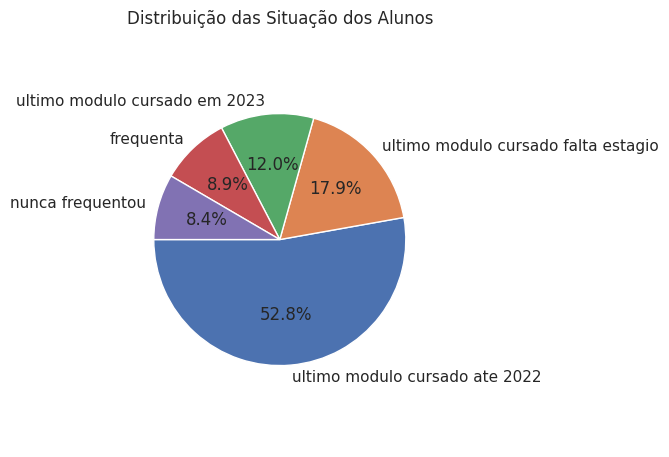

In [132]:
plt.pie(df_obsGrouped2, labels=df_obsGrouped2.index, autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title('Distribuição das Situação dos Alunos')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Valor Total Aberto por Observação')

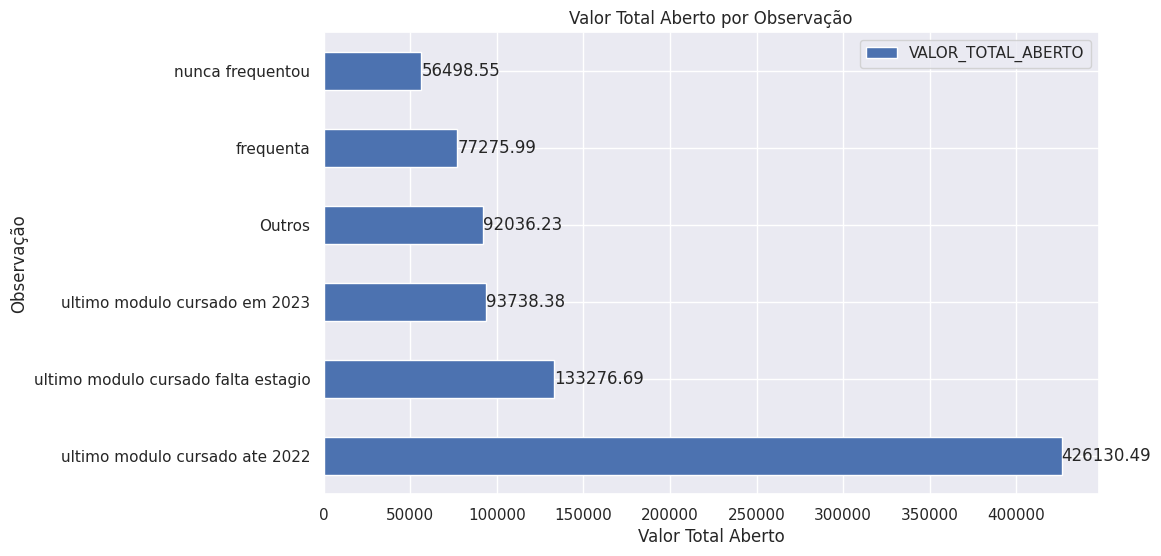

In [133]:
df_contagem = df_glosa.groupby('OBSERVACAO')[['VALOR_TOTAL_ABERTO']].sum().sort_values('VALOR_TOTAL_ABERTO', ascending = False)
ax = df_contagem.plot(kind='barh', figsize=(10, 6))

# Adicionar etiquetas (labels) aos valores das barras
for index, value in enumerate(df_contagem['VALOR_TOTAL_ABERTO']):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center')

# Configurações do gráfico
plt.xlabel('Valor Total Aberto')
plt.ylabel('Observação')
plt.title('Valor Total Aberto por Observação')

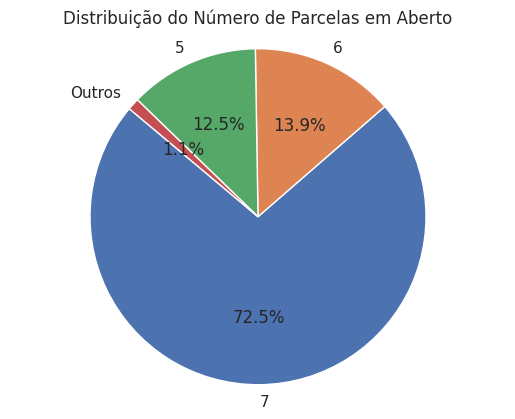

In [134]:
num_parc_counts = df_glosa['NUM_PARCELAS_EM_ABERTO'].value_counts()
num_parc_counts['Outros'] = num_parc_counts[num_parc_counts < 55].sum()
num_parc_counts2 = num_parc_counts[num_parc_counts >= 5]
num_parc_counts2
labelsParcela = ["7 Parcelas","6 Parcelas","5 Parcelas","Outros"]
# Criar o gráfico de pizza com a distribuição dos valores
plt.pie(num_parc_counts2, labels=num_parc_counts2.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Torna o gráfico de pizza circular
plt.title('Distribuição do Número de Parcelas em Aberto')

# Exibir o gráfico
plt.show()

In [135]:
num_parc_counts2

7         319
6          61
5          55
Outros      5
Name: NUM_PARCELAS_EM_ABERTO, dtype: int64

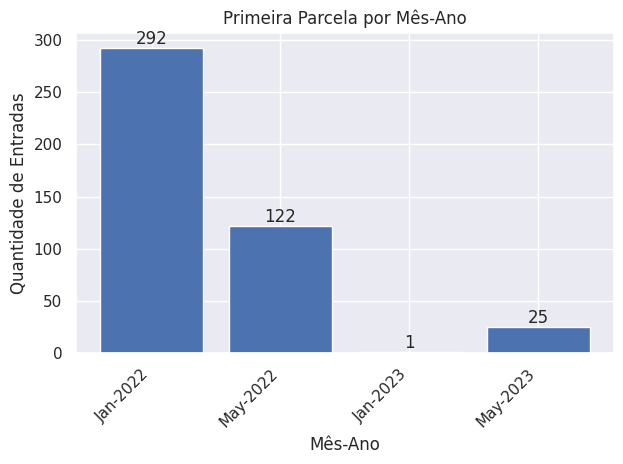

In [136]:
import calendar
df_grouped = df_glosa.groupby([df_glosa['PRIMEIRA_PARCELA'].dt.year, df_glosa['PRIMEIRA_PARCELA'].dt.month])['idAluno'].count()

# Criar o gráfico de barras com meses e anos no eixo x e quantidades no eixo y
x_labels = [f'{calendar.month_abbr[month]}-{year}' for year, month in df_grouped.index]
plt.bar(range(len(df_grouped)), df_grouped.values)
plt.xlabel('Mês-Ano')
plt.ylabel('Quantidade de Entradas')
plt.title('Primeira Parcela por Mês-Ano')
plt.xticks(range(len(df_grouped)), x_labels, rotation=45, ha='right')

# Adicionar os valores das porcentagens ao lado de cada barra
for i, value in enumerate(df_grouped.values):
    plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.tight_layout()

# Exibir o gráfico
plt.show()

In [137]:
def create_glosa(row):
    if row['NUM_DIAS_EM_ABERTO'] > 100 and row['NUM_PARCELAS_EM_ABERTO'] > 4:
        return 1
    else:
        return 0

In [138]:
df_geral['GLOSA'] = df_geral.apply(lambda row: create_glosa(row), axis=1)